<a href="https://colab.research.google.com/github/mavischi/Prediction-of-quality-of-Wine/blob/main/Project_02_Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備環境

In [4]:
import numpy as np
import pandas as pd
import warnings

# 隱藏 FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
df = pd.read_csv(url)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 觀察資料

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

* fixed acidity 固定酸度: 大多數與葡萄酒有關的酸或固定的或非揮發性的（不易蒸發）<br>
* volatile acidity 揮發酸度: 葡萄酒中乙酸的含量，含量過高會導致令人不愉快的醋味<br>
* citric acid 檸檬酸: 少量檸檬酸可以為葡萄酒增添「新鮮度」和風味<br>
* residual sugar 殘糖: 發酵停止後剩餘的糖分含量，很少有低於 1 克/公升的葡萄酒，大於 45 克/公升的葡萄酒被認為是甜的<br>
* chlorides 氯化物: 酒中的鹽含量<br>
* free sulfur dioxide 遊離二氧化硫: 遊離形式的 SO2 存在於分子 SO2（作為溶解氣體）和亞硫酸氫根離子之間的平衡狀態；它可以防止微生物生長和葡萄酒氧化<br>
* total sulfur dioxide 總二氧化硫: 遊離形式和結合形式的 S02 的量；在低濃度下，SO2 在葡萄酒中幾乎檢測不到，但當遊離 SO2 濃度超過 50 ppm 時，SO2 在葡萄酒的鼻子和味道中變得明顯<br>
* density 密度: 水的密度接近水的密度，取決於酒精百分比和糖含量<br>
* pH: 描述葡萄酒的酸性或鹼性程度，範圍從 0（非常酸性）到 14（非常鹼性）；大多數葡萄酒的 pH 值在 3-4 之間<br>
* sulphates 硫酸鹽: 一種葡萄酒添加劑，可提高二氧化硫氣體 (S02) 水平，並起到抗菌和抗氧化劑的作用<br>
* alcohol 酒精 <br>
* quality 品質 <br>

### 觀察資料中各特徵的分布情況

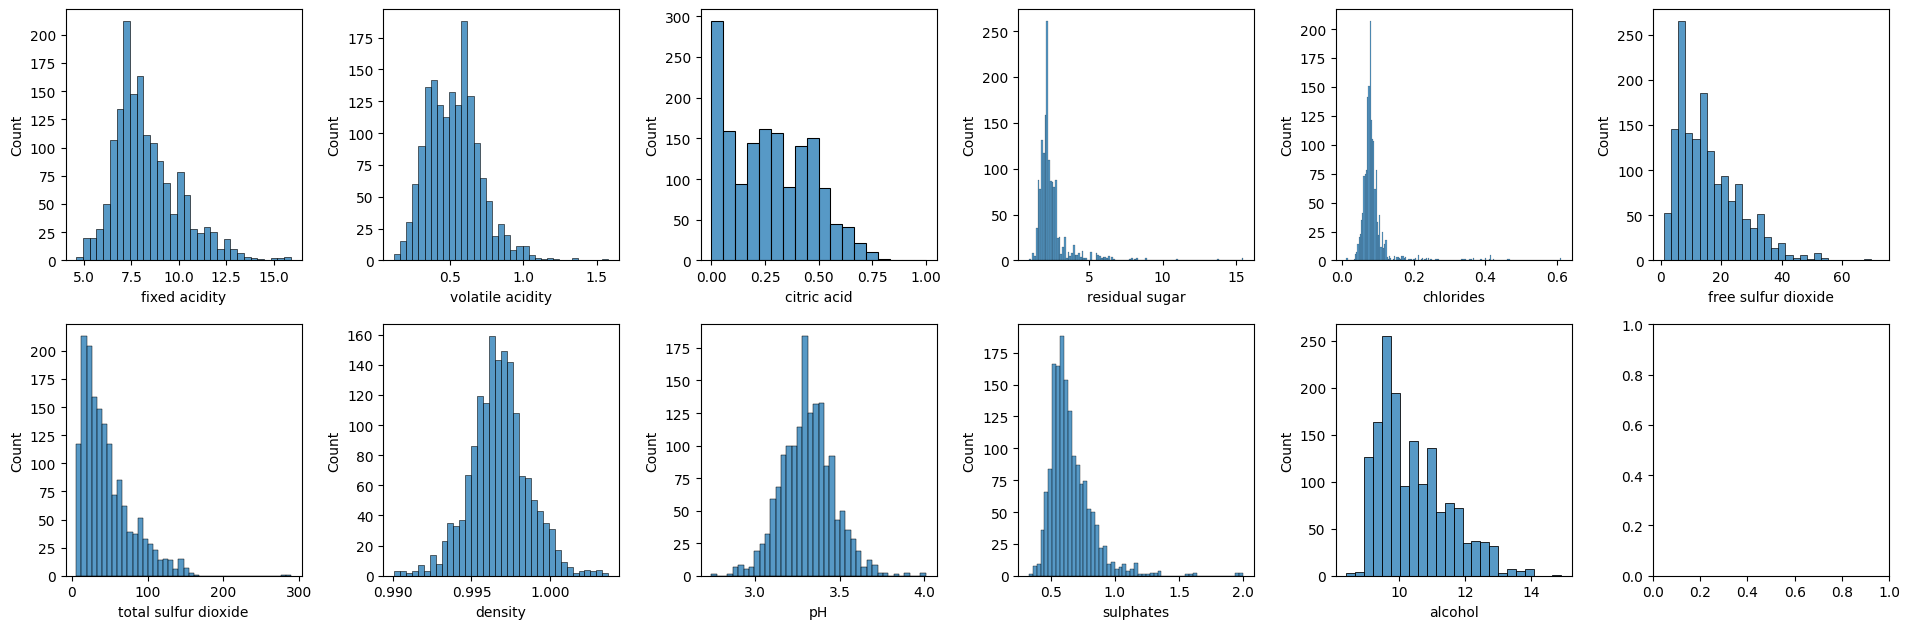

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol']

n_rows = 2
n_cols = 6

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2, n_rows*3.2))

for r in range(0,n_rows):
  for c in range(0, n_cols):
    i = r * n_cols + c
    if i < 11:
      ax = axs[r][c]
      sns.histplot(x=df[cols[i]], ax=ax)
      ax.set_title = cols[i]
plt.tight_layout()
plt.show()

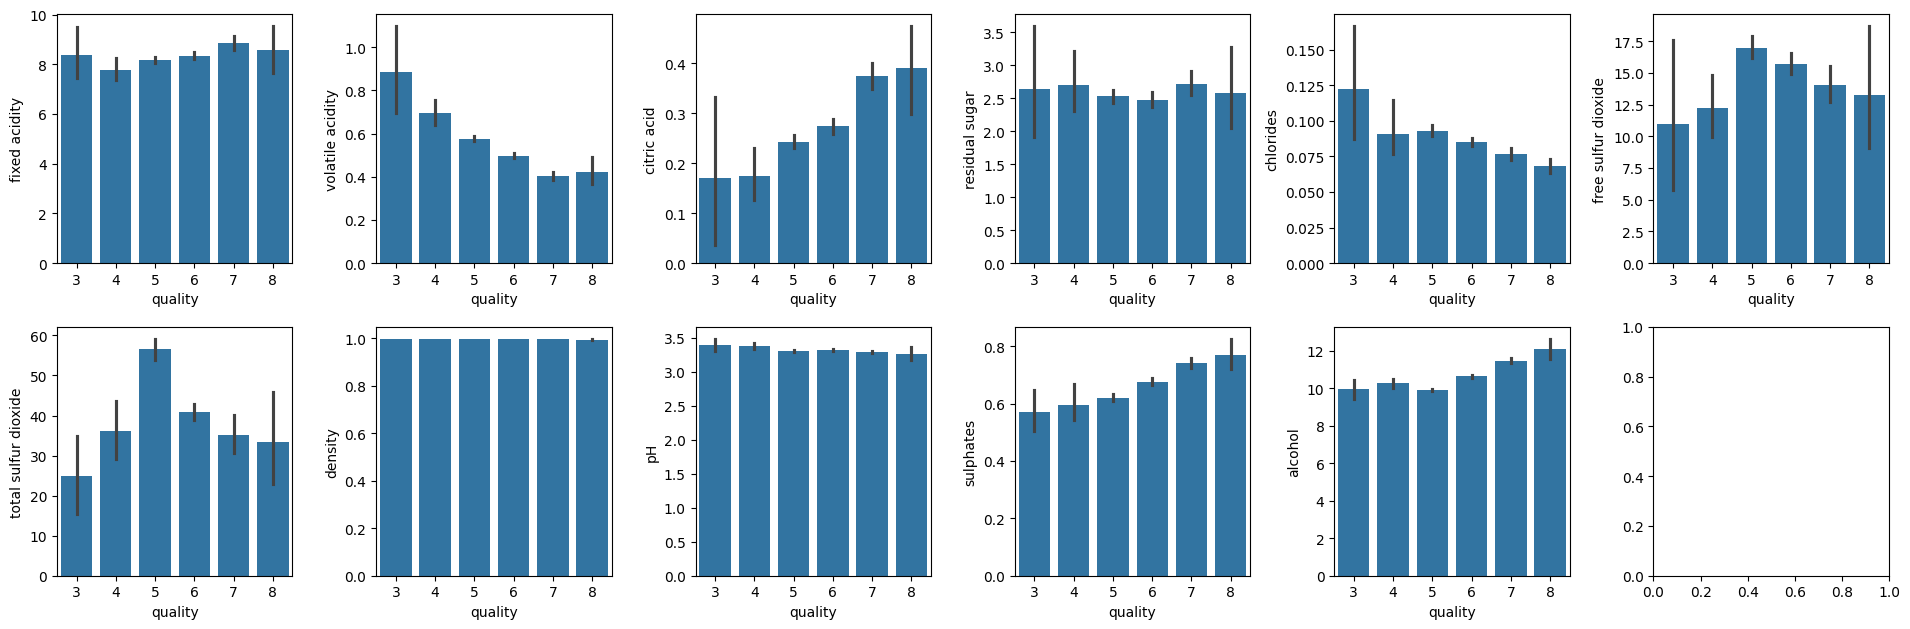

In [13]:
n_rows = 2
n_cols = 6

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2, n_rows*3.2))

for r in range(0,n_rows):
  for c in range(0, n_cols):
    i = r * n_cols + c
    if i < 11:
      ax = axs[r][c]
      sns.barplot(x=df['quality'], y=df[cols[i]], ax=ax)
      ax.set_title = cols[i]
plt.tight_layout()
plt.show()

# Baseline 版本

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [16]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=5)
print(rfc_eval)

[0.66796875 0.6875     0.62890625 0.69921875 0.75686275]
